# `Binomial Distribution`

# <font color=red>Mr Fugu Data Science</font>

# (◕‿◕✿)

# `Purpose & Outcome`

+ Show the `PDF` and `CDF` with formulas and brief explanation
    + Plot each
    + Show examples
+ Go over R-studio functions to use and brief expalantions of each

In [34]:
library(tidyr)
library(ggplot2)
library(tidyverse)

# `Binomial:` 

+ As a side note: when you sum the `Bernoulli Trials you end up with a Binomial Distribution`


`--------------`

# `PDF`

<font size=6>$f(x) = {{n}\choose{k}} p^x (1-x)^{(n-x)}$</font><font size=4>, where x=1,2,3,... n</font>

+ `Discrete Probability Function`: describes (n) independent trials. 

+ `If you have (n) trials, with (p) as the successful trials then (x) will be probability of successful trials.`

`-------------------------`

<font size=4>`Mean` np</font>

<font size=4>`Standard Deviation` $\sqrt{np(1-p)}$</font>


**`Simple idea of what is going on`:**

+ Each outcome is independent for each trial

+ There is a fixed number of trials

+ The probability of success for each trial is the same

+ You only have two outcomes that can occur: (T/F), (Success/Fail)

`------------------------------------`

**`How About We Break Down The Above Formula:`**

<font size=5>$P(X) = \frac{n!}{(n-X)! X!} p^X (1-X)^{n-X}$</font>

We can say that:

+ **`failure`** `= (1-X)`

+ **`P(X)`** `= the probability of the number of successes for each trial (n)`

+ **`X`**`= number of successes in (n) trials`

+ **`p`**`the probability for success`

+ **`n`**`= number of trials`

# Varying Number of Trials to see what happens (*ceteris paribus*)

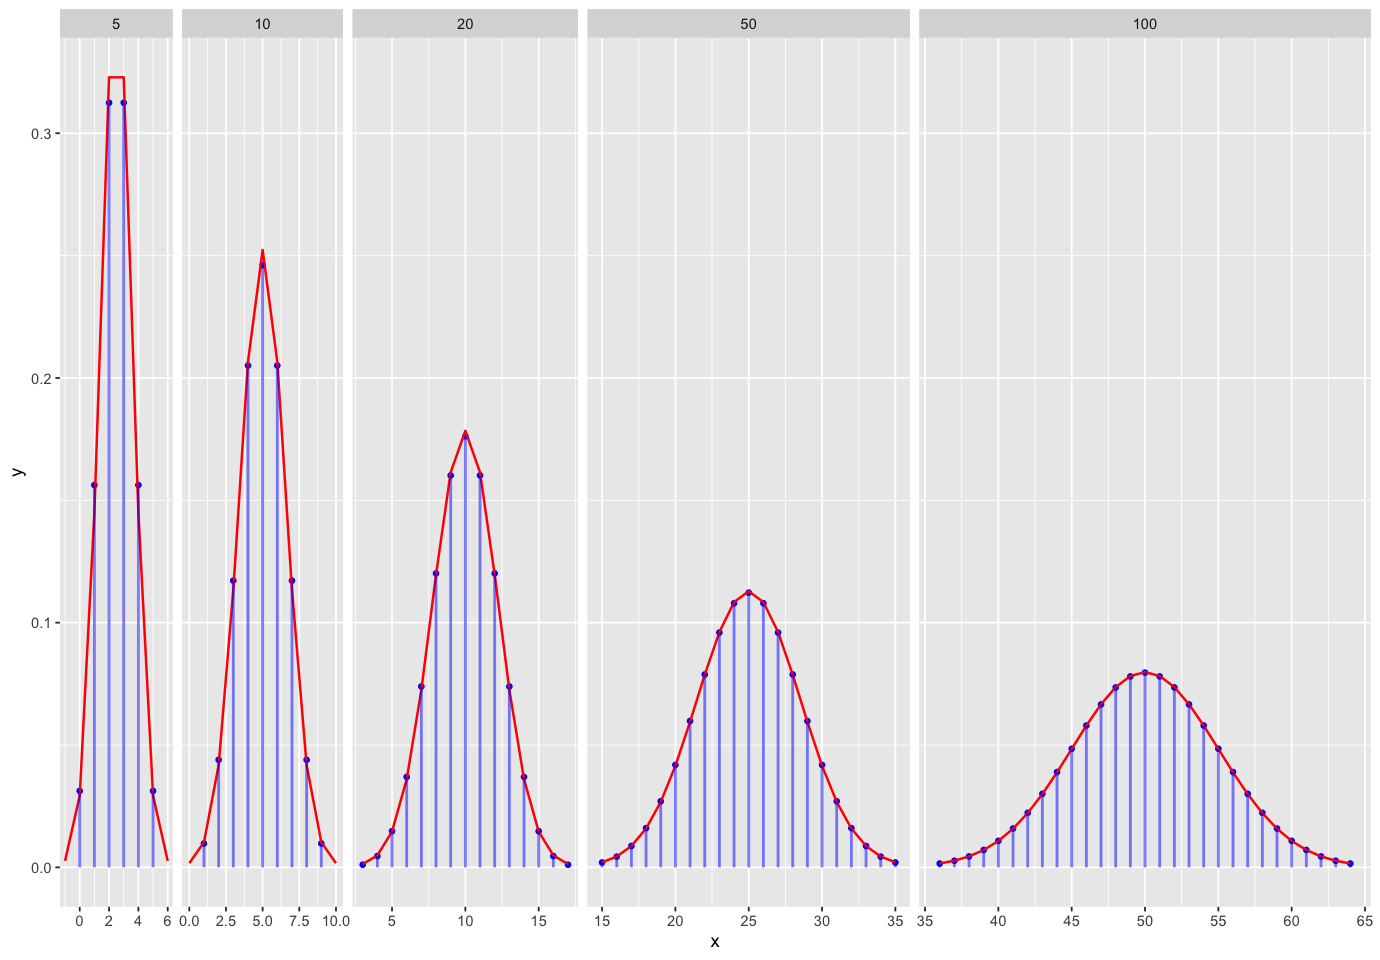

In [35]:
x <- -5:250
n = c(5,10,20,50,100)
p = 0.5
ymin = 1e-3
normal=data.frame(x=rep(x, length(n)),
                  y=dnorm(x, rep(n,each=length(x))*p,
                (rep(n, each=length(x))*p*(1-p))^0.5),
                  n=rep(n, each=length(x)))
binom = data.frame(x=rep(x, length(n)), 
                   y=dbinom(x, rep(n, each=length(x)), p),
                   n=rep(n, each=length(x)))

ggplot(binom %>% filter(y > ymin), aes(x, y)) +
  geom_point(size=1.2, colour="blue") +
  geom_line(data=normal %>% filter(y > ymin), lwd=0.7, colour="red") +
  geom_segment(aes(x=x, xend=x, y=0, yend=y), lwd=0.8, alpha=0.5, colour="blue") +
  facet_grid(. ~ n, scales="free", space="free")

# citation for link

`--------------------`

# `CDF`

<font size=6>$f(x) = \sum_{i=0}^{\lfloor k \rfloor}{{n}\choose{k}} p^x (1-x)^{(n-x)}$</font><font size=4>, where x=1,2,3,... n</font>

+ Lets you find the probability of obtaining the probability you observed `(less than or equal) to (x) successes in (n) trials with probability (p) for each trial`.

`Tips:`

+ The steeper the curve (S), the smaller the width of the curve
    + If almost vertical, then you will have *high kurtosis* "fat tails"
+ Closer to 45 degree the more normal the curve will be
    + Identical curve but shifted (left/right) indictates a multiplicative effect
+ If you have a lot of trials and fairly symmetric success/fail then you can approximate the distribution.

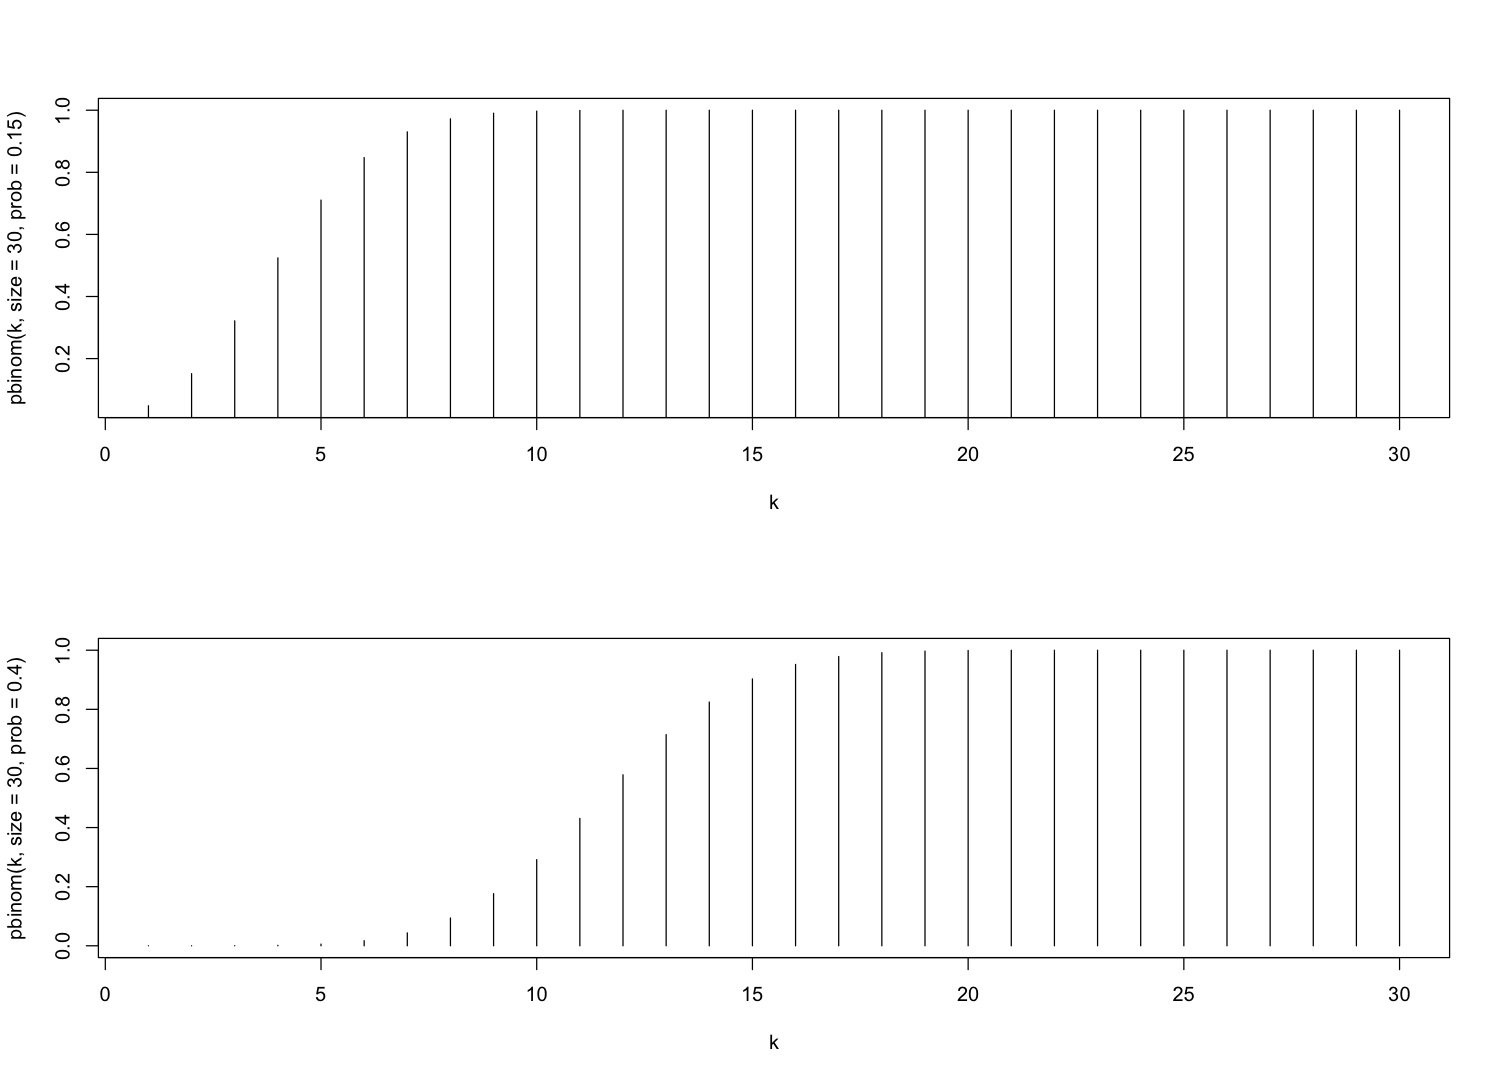

In [20]:
options(repr.plot.width=12.5, repr.plot.height=9)

p<-0.6
n<-30
x<-0:n
# plot1<-plot(x, pbinom(x, size = n, prob = p), type="l")
# plot2<-plot(x, pbinom(x, size = n, prob = .7), type="l")
#      main = "Cumulative distribution function for Bin(13,0.7)")

# # ggplot()
# grid.arrange(plot1, plot2, nrow = 1)
# curve(dbinom(x, size = n, prob = p))
par(mfrow=c(2,1))
k <- c(1:30)
plot(k,pbinom(k,size=30,prob=.15),type="h")
plot(k,pbinom(k,size=30,prob=.4),type="h")
# par(mfrow=c(1,1))

# `Notice Relationship of PDF and CDF:`

+ at X=8 for CDF == the sum of 0:8 PDf

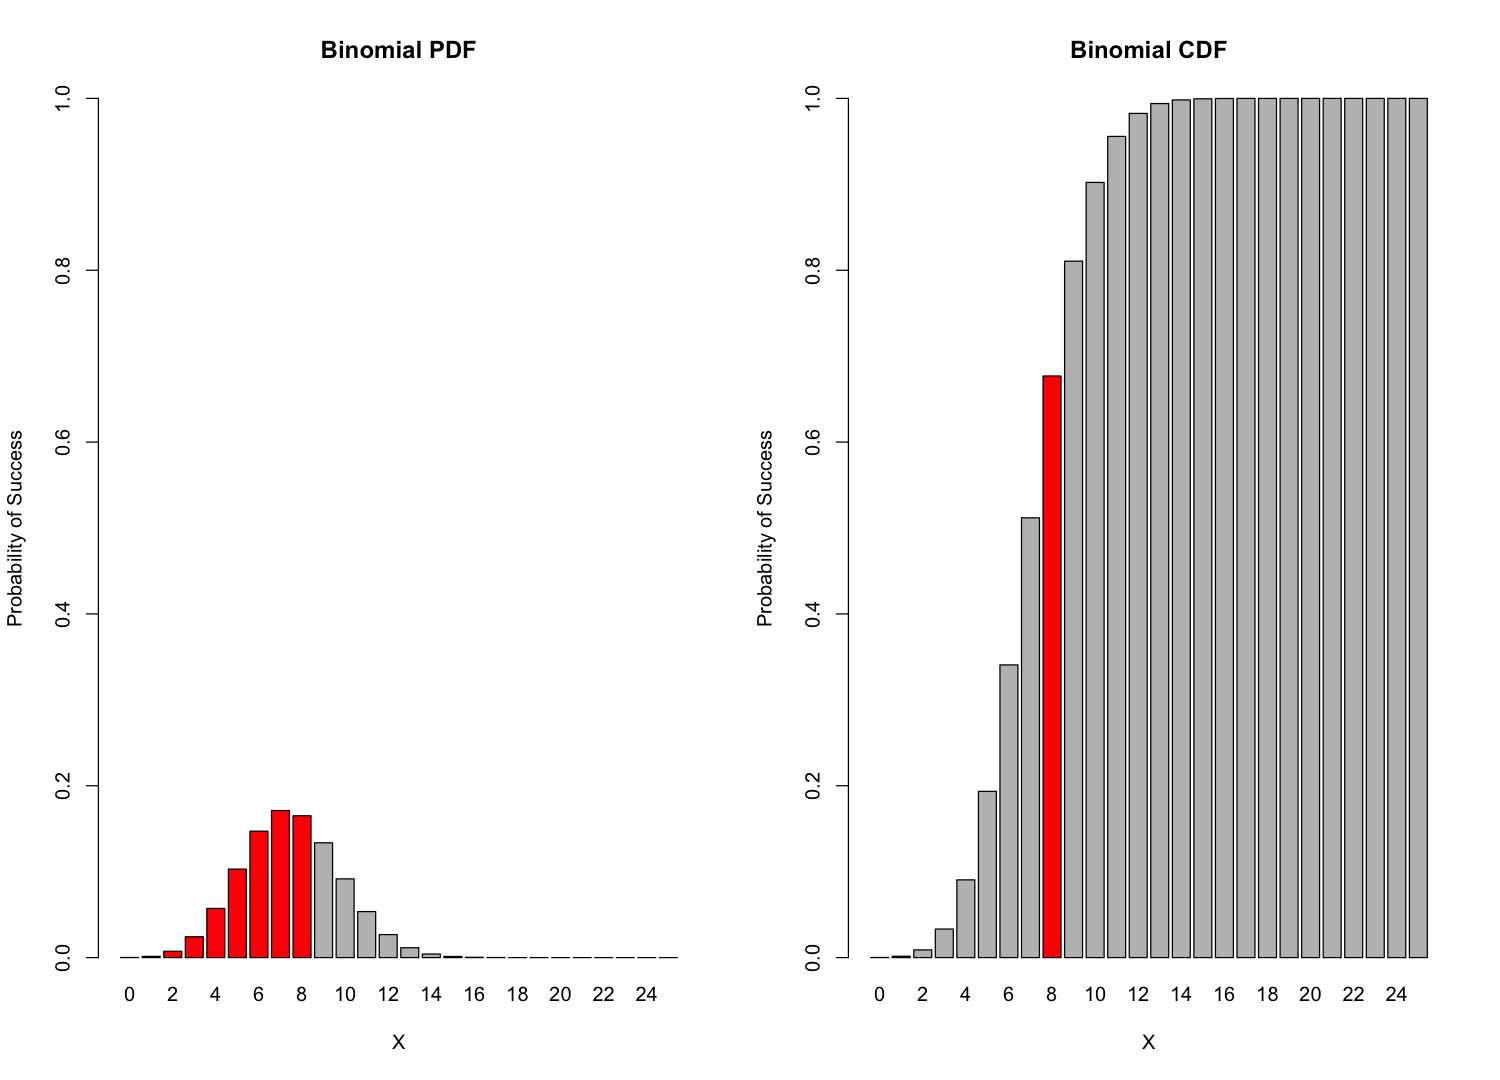

In [21]:
par(mfrow = c(1,2))
barplot(height = dbinom(0:25, size = 25, p = 0.3), 
        names.arg = 0:25, 
        ylim = c(0,1),
        main = "Binomial PDF", xlab = 'X', ylab = 'Probability of Success',
        col = c(rep("red", 9), rep("gray", 8)))
barplot(height = pbinom(0:25, size = 25, p = 0.3), 
        names.arg = 0:25, 
        ylim = c(0,1),
        main = "Binomial CDF", xlab = 'X', ylab = 'Probability of Success',
        col = c(rep("gray", 8), "red", rep("gray", 12)))

# adapted citation in bottom

# Available functions in R for `Binomial Distribution`

`dbinom(x, size, prob)
pbinom(x, size, prob,lower.tail)
qbinom(p, size, prob)
rbinom(n, size, prob)`

`size=# of trials
x= value you want to get
lower.tail=TRUE, deals with finding the left size`

+ **`dbinom():`** returns the PDF,

+ **`pbinom():`** Cummulative probability function which will return the prob. $<= OR >=$ your trials (*q*),from a total number of trials (*size*)
`If you wanted the less than or equal to of some (q) then lower.tail=TRUE`

+ **`qbinom():`** Try to predict the number of successes, given a quantile
    + opposite of pbinom(), instead you are giving the number of trials that are $<=$ to (size). The `lower.tail` is available to allow us to use the $>=$

+ **`rbinom():`**

# `Note a few things:`

+ As the probability goes left or right from `0.5` the curve will skew to one side at the peak.

+ For the same number of sucesses but altering the probability you will notice: that the   mean goes toward the higher success (to the right) and the incerase in probability of successes. Since the chance of it occuring naturally will be quite high anyway.

# `Plot Below: Varying probability` **`(ceteras paribus)`**

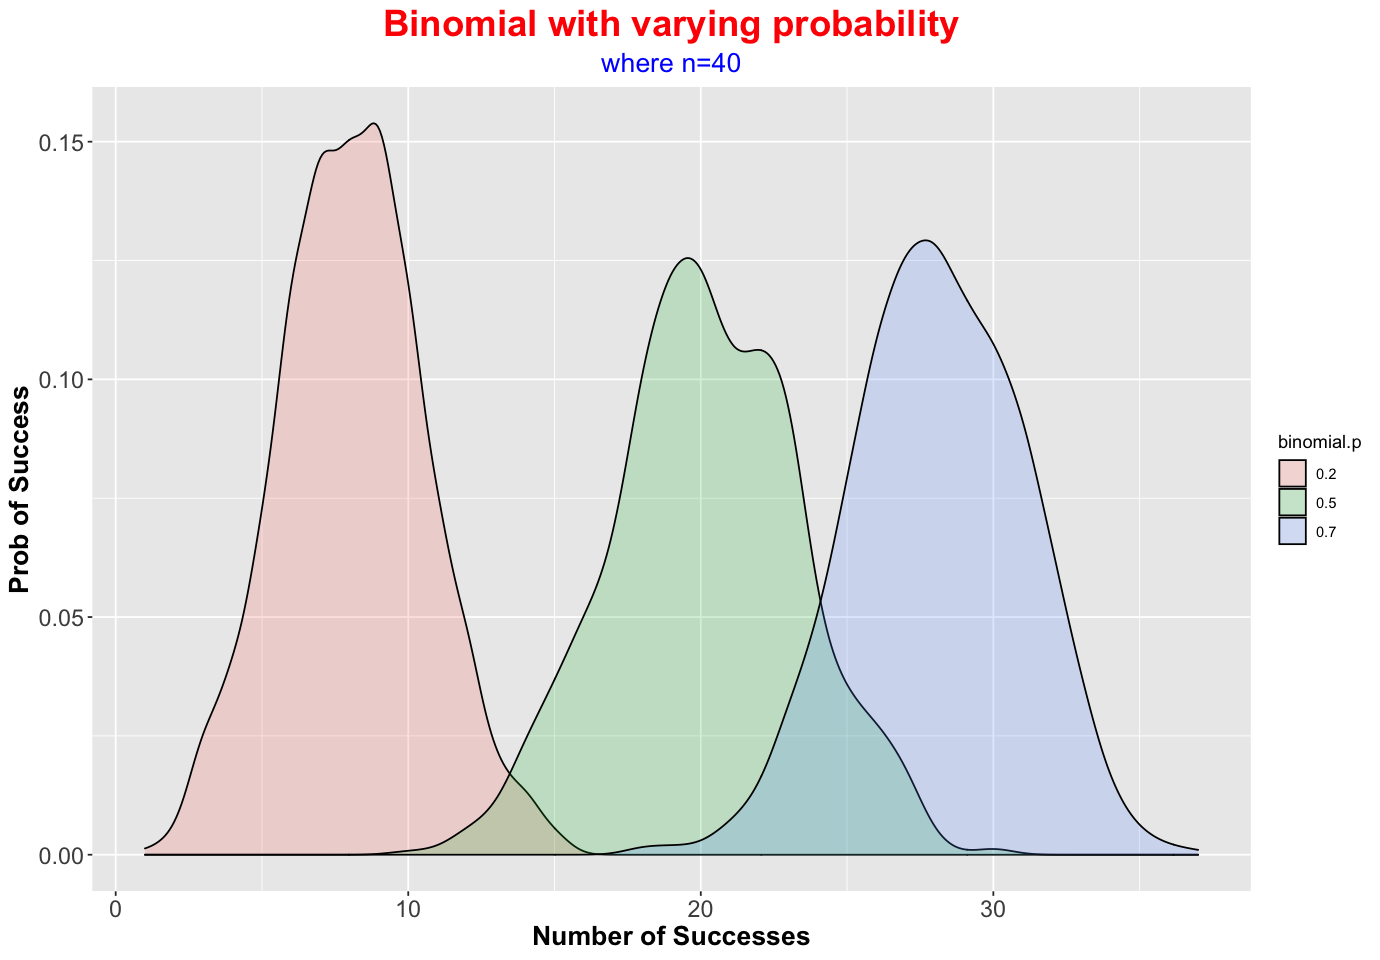

In [37]:
set.seed(12345)

# this will increase the full plot size here:
# options(repr.plot.width=12.5, repr.plot.height=10)

df <- rbind(data.frame(binom=rbinom(1000, 40, 0.2),
binomial.p='0.2') ,
data.frame(binom=rbinom(1000, 40, 0.5),binomial.p='0.5'),
data.frame(binom=rbinom(1000, 40, 0.7),binomial.p='0.7'))
# ,data.frame(binom=rbinom(1000, 40, 0.9),binomial.p='0.9'))

ggplot(df, aes(binom, fill=binomial.p)) + labs(title="Binomial with varying probability",
subtitle="where n=40")+
theme(
  plot.title = element_text(color = "red", size = 22, face = "bold",hjust = .5),
  plot.subtitle = element_text(color = "blue",size=16,hjust=.5))+
geom_density(alpha=0.2) +
xlab('Number of Successes')+ 
theme(axis.text=element_text(size=12),
axis.title=element_text(size=14,face="bold"))+
ylab('Prob of Success')+ theme(axis.text=element_text(size=14),
axis.title=element_text(size=16,face="bold"))


# `How about figuring out these numbers for the peaks:`

+ *First Simulated then Actual numbers!*

In [23]:
# these are the peak values for each plot! (depending on seed) you will have shifting of
# plot, but these vaules will be the same though.

# These are simulated values because you are drawing randomly!
print("Simulated Mean for each probability")
mean(rbinom(1000, size=40, prob=.2))
mean(rbinom(1000, size=40, prob=.5))
mean(rbinom(1000, size=40, prob=.7))

[1] "Simulated Mean for each probability"


[1] 7.898

[1] 19.896

[1] 27.98

In [24]:
# This pretty much matches up with your probability on the graphs (round up)
# simulated values of probability
print("Simulated Probability of Success")
mean(rbinom(1000, size=40, prob=.2)==8)
mean(rbinom(1000, size=40, prob=.5)==20)
mean(rbinom(1000, size=40, prob=.7)==28)

[1] "Simulated Probability of Success"


[1] 0.165

[1] 0.133

[1] 0.145

# `What is going on here?`

+ If we have 40 items and we have a 20% chance of this occuring, what is the probability of getting exactly 8?
    + We will get: 15.6% success rate

# `Note: Acutal Exact Values below`

In [25]:
# actual values: 
act_2<-round(dbinom(x = 8, size = 40, prob = 0.2),3)
act_5<-round(dbinom(x = 20, size = 40, prob = 0.5),3)
act_7<-round(dbinom(x = 28, size = 40, prob = 0.7),3)

sprintf("Acutal Probs based in size=40, with prob=0.2, you getprob_success : %s",act_2)
sprintf("with prob=0.5, you get prob_success : %s",act_5)
sprintf("with prob=0.7, you get prob_success : %s",act_7)

[1] "Acutal Probs based in size=40, with prob=0.2, you getprob_success : 0.156"

[1] "with prob=0.5, you get prob_success : 0.125"

[1] "with prob=0.7, you get prob_success : 0.137"

# Ex.) `Finding Exactly  "=8"`

+ Assume we are going to have a probability of 20% of our 40 people sampled for each trial really like coffee. Lets find exactly 8 of them and see what the probability of success would be.

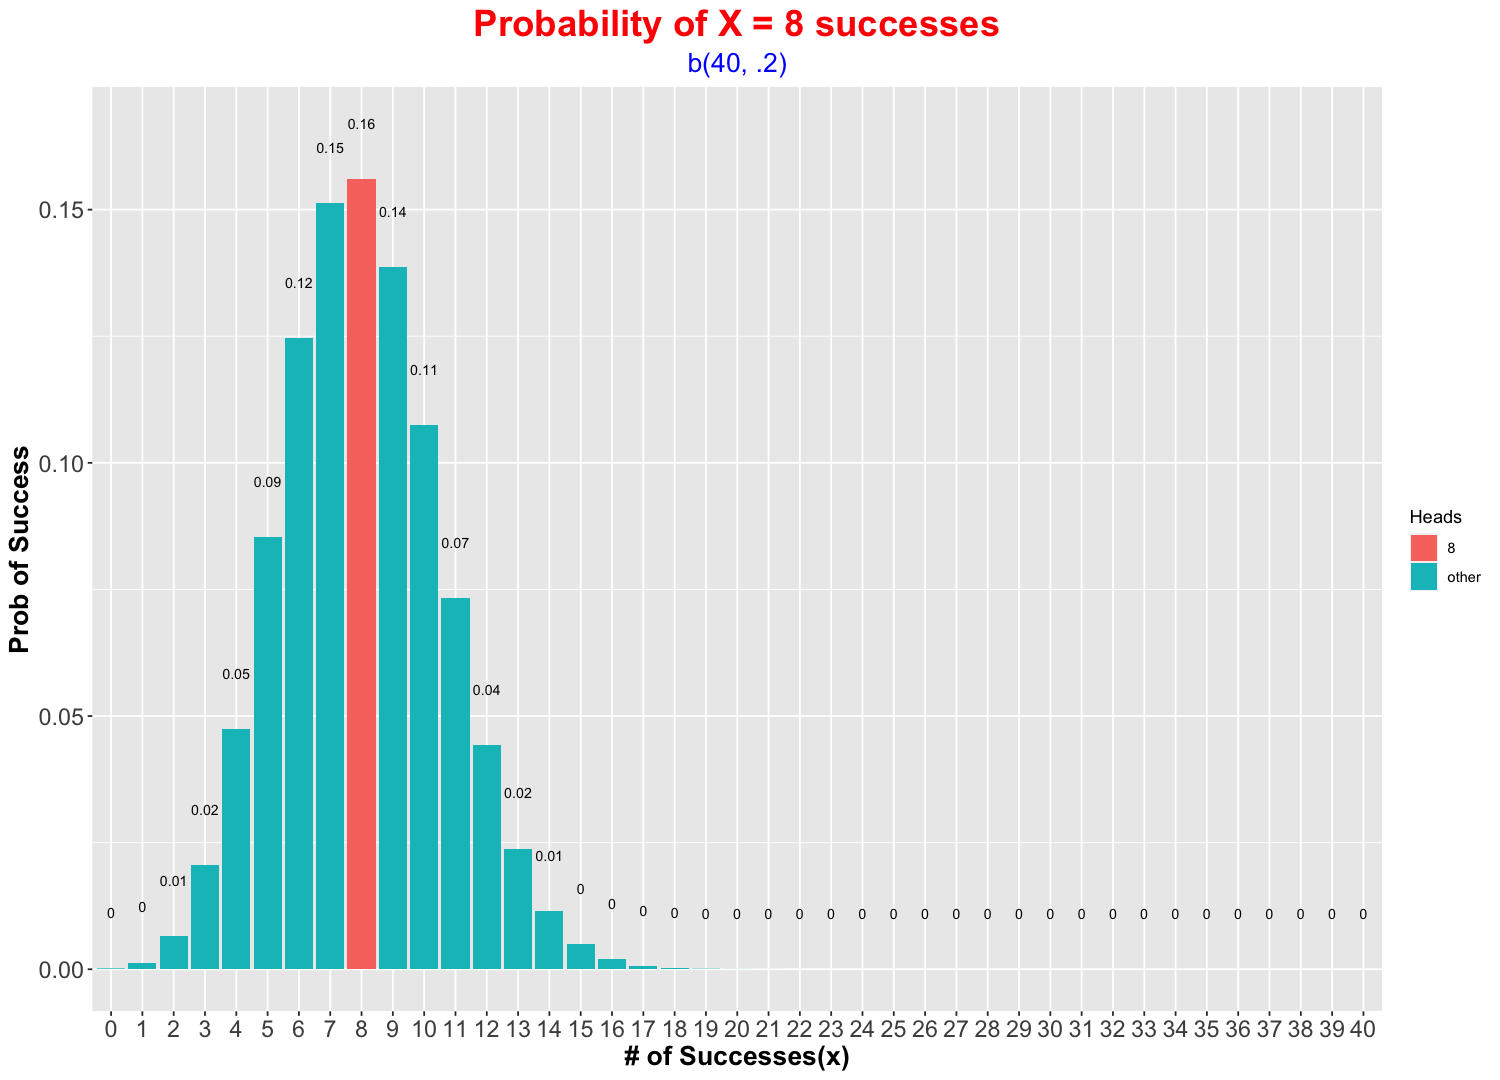

In [26]:
# look at this clearly for one example
data.frame(heads = 0:40, prob = dbinom(x = 0:40, size = 40, prob = 0.2)) %>%
  mutate(Heads = ifelse(heads == 8, "8", "other")) %>%
ggplot(aes(x = factor(heads), y = prob, fill = Heads)) +
  geom_col() +
  geom_text(
    aes(label = round(prob,2), y = prob + 0.01),
    position = position_dodge(0.9),
    size = 3,
    vjust = 0
  ) +
  labs(title = "Probability of X = 8 successes",
       subtitle = "b(40, .2)",
       x = "# of Successes(x)",
       y = "Probability of Success") +theme(
  plot.title = element_text(color = "red", size = 22, face = "bold",hjust = .5),
  plot.subtitle = element_text(color = "blue",size=16,hjust=.5))+
# xlab('# of Successes')+ 
theme(axis.text=element_text(size=12),
axis.title=element_text(size=14,face="bold"))+
ylab('Prob of Success')+ theme(axis.text=element_text(size=14),
axis.title=element_text(size=16,face="bold"))

# adapted from r-pubs (citation below)

# Ex. ) `What's the probability of  <= 8 people `

+ `LEFT TAIL`: you need to do `lower.tail= TRUE`

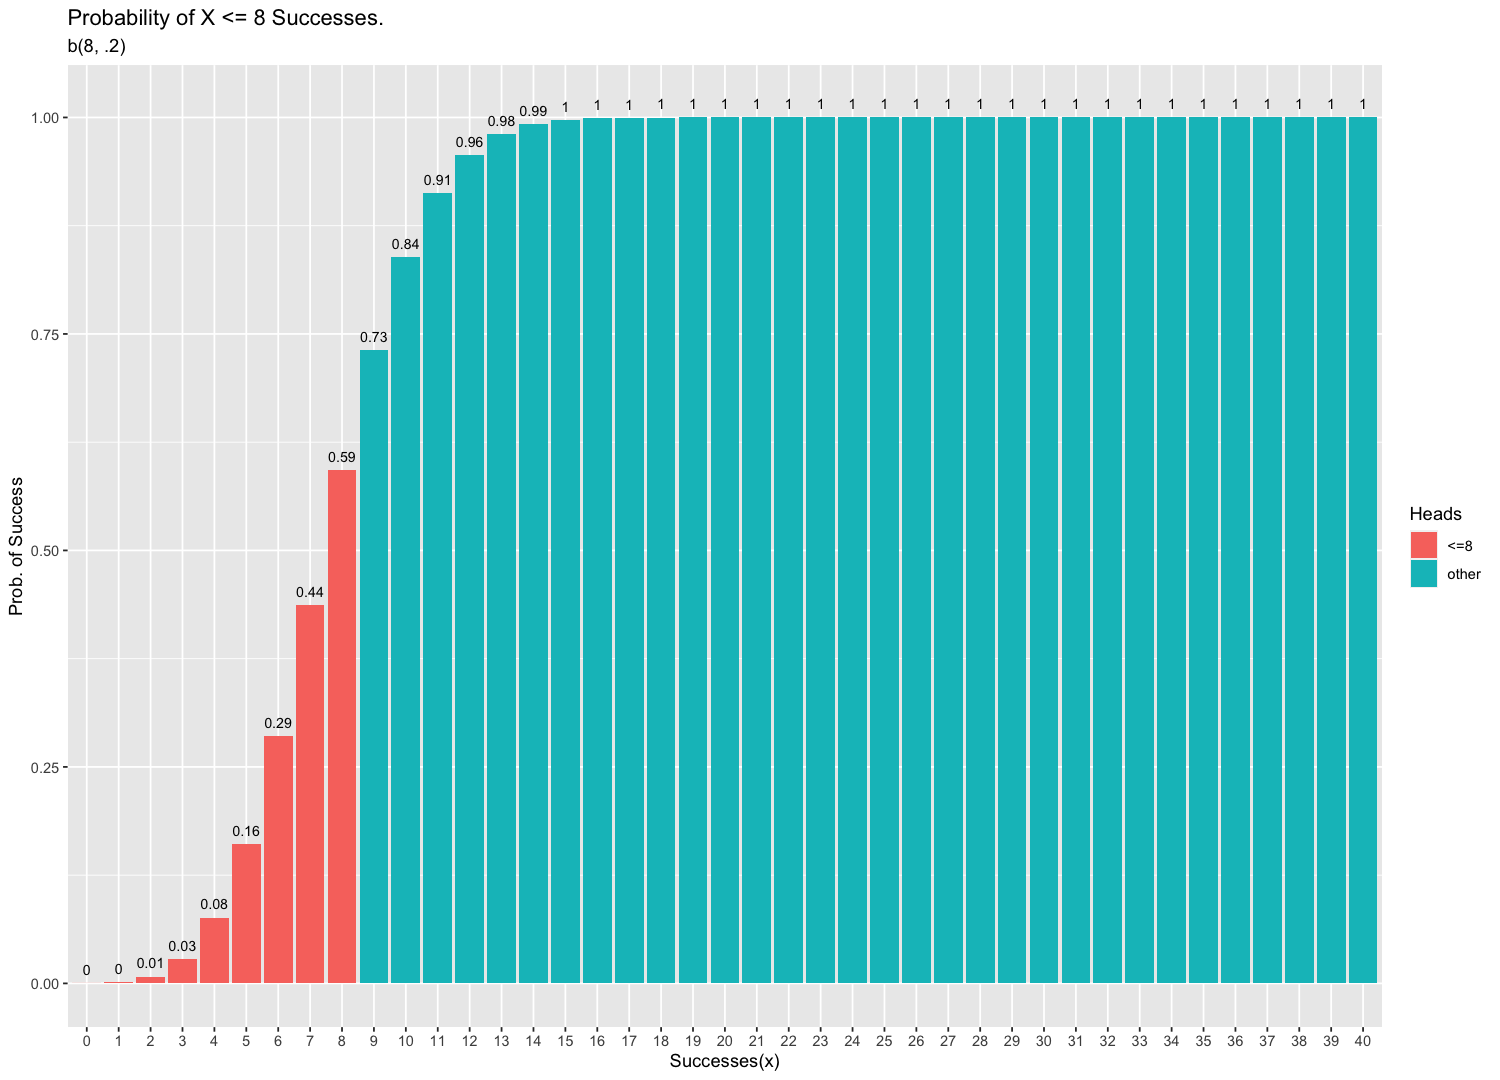

In [27]:
# x <- rbinom(8, size= 40, prob = 0.2)
# y <- pbinom(x, size = 40, prob = 0.2)
# df <- data.frame(x=1:40, prob=dbinom(1:40, 40, prob=0.2))
# dd<-df
# require(ggplot2)
# ggplot(data=dd, aes(x=x,y=prob)) + geom_line() +
#       geom_ribbon(data=subset(dd,x<=8),aes(ymax=prob),ymin=0,
#                   fill="red", colour = NA, alpha = 0.5)
data.frame(heads = 0:40, 
           pmf = dbinom(x = 0:40, size = 40, prob = 0.2),
           cdf = pbinom(q = 0:40, size = 40, prob = 0.2, 
                        lower.tail = TRUE)) %>%
  mutate(Heads = ifelse(heads <= 8, "<=8", "other")) %>%
ggplot(aes(x = factor(heads), y = cdf, fill = Heads)) +
  geom_col() +
  geom_text(
    aes(label = round(cdf,2), y = cdf + 0.01),
    position = position_dodge(0.9),
    size = 3,
    vjust = 0
  ) +
  labs(title = "Probability of X <= 8 Successes.",
       subtitle = "b(8, .2)",
       x = "Successes(x)",
       y = "Prob. of Success") 

# adapted from citation in links

# `Well We have a 59.3% probability of <= 8 `

In [28]:
# exact value:
round(pbinom(8, size = 40, prob = 0.2,lower.tail=TRUE),3)

[1] 0.593

In [29]:
# simulation:
mean(rbinom(1000, size = 40, prob = 0.2)<=8)

[1] 0.571

# Ex. ) `lets get the upper tail (right side)` with `(>=)`

+ Assume we have a group of chickens we want to catch, but they are real fast. Say we have 40 chickens and we have a 20% catching with a whistle that attracts them. What is the probability of catching at least 8 (>=) chickens.

`-------------------`

+ `Right Tail:` need `lower.tail=FALSE` 
+ And since you are doing >= also need to pay attention to bold disclaimer!

**EXTREMELY IMPORTANT:** you need to use `1-your_value of q` if using `>=`

`otherwise:` use value of `q` if only `>` is needed


`-------------------------`
*Check links to see I am telling the truth!*
`-----------------------`

https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_probability/bs704_probability7.html

https://rpubs.com/mpfoley73/458411

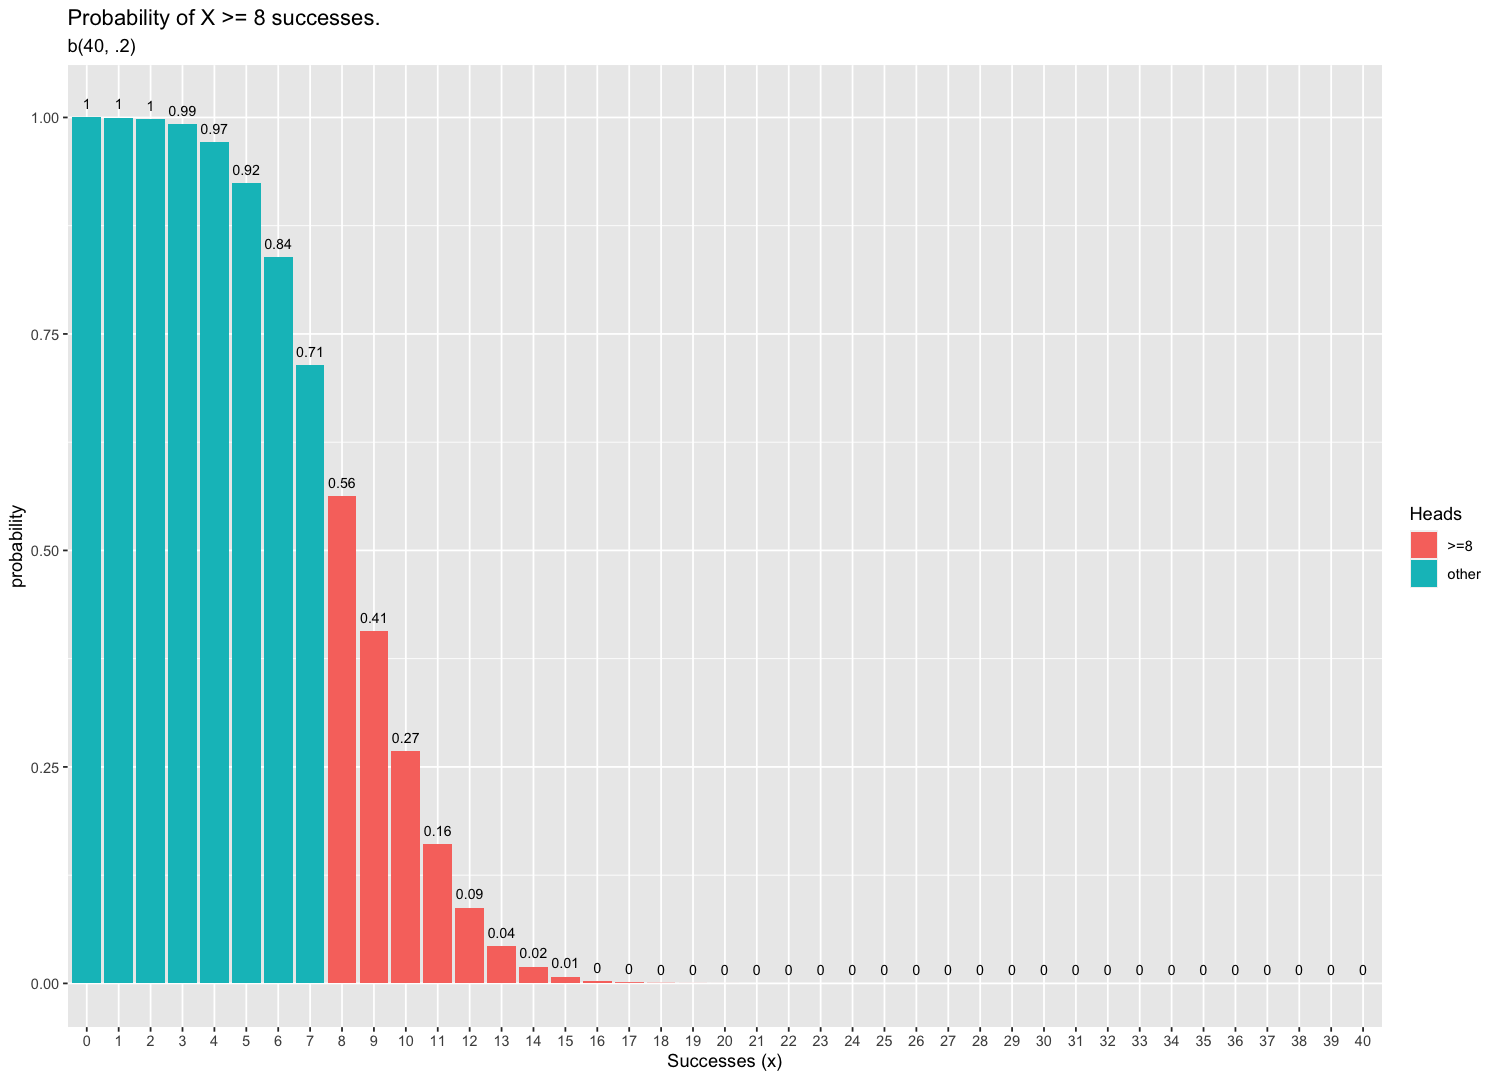

In [30]:
data.frame(heads = 0:40, 
           pmf = dbinom(x = 0:40, size = 40, prob = 0.2),
           cdf = pbinom(q =-1:39, size = 40, prob = 0.2, # pay attn here!
                        lower.tail = FALSE)) %>%
  mutate(Heads = ifelse(heads >= 8, ">=8", "other")) %>% # >= pay attention
ggplot(aes(x = factor(heads), y = cdf, fill = Heads)) +
  geom_col() +
  geom_text(
    aes(label = round(cdf,2), y = cdf + 0.01),
    position = position_dodge(0.9),
    size = 3,
    vjust = 0
  ) +
  labs(title = "Probability of X >= 8 successes.",
       subtitle = "b(40, .2)",
       x = "Successes (x)",
       y = "probability") 

In [14]:
# set.seed(1234) 

#exact:
print(" Exact probability")
round(pbinom(7,size=40,p=0.2,lower.tail  = FALSE),3) # needed 7 so we can include 8

#simulated
print("Simulated: (also, this will always be different since you are using 'r')")
mean(rbinom(1000, size = 40, prob = 0.2)>=8)

print('Verify that I am not crazy and everything aligns')
round(1 - pbinom(q=7, size=40, prob=.2),3)

[1] " Exact probability"


[1] 0.563

[1] "Simulated: (also, this will always be different since you are using 'r')"


[1] 0.546

[1] "Verify that I am not crazy and everything aligns"


[1] 0.563

# `Strickly greater (>) than:`

+ `Ex. )` Assume we have 20% of adults are allergic to bathing due to allergic reactions, assume they are given magic soap. There are 40 people given the medicated soap, what is the probability that the medication is effective in more than 8 people studied?

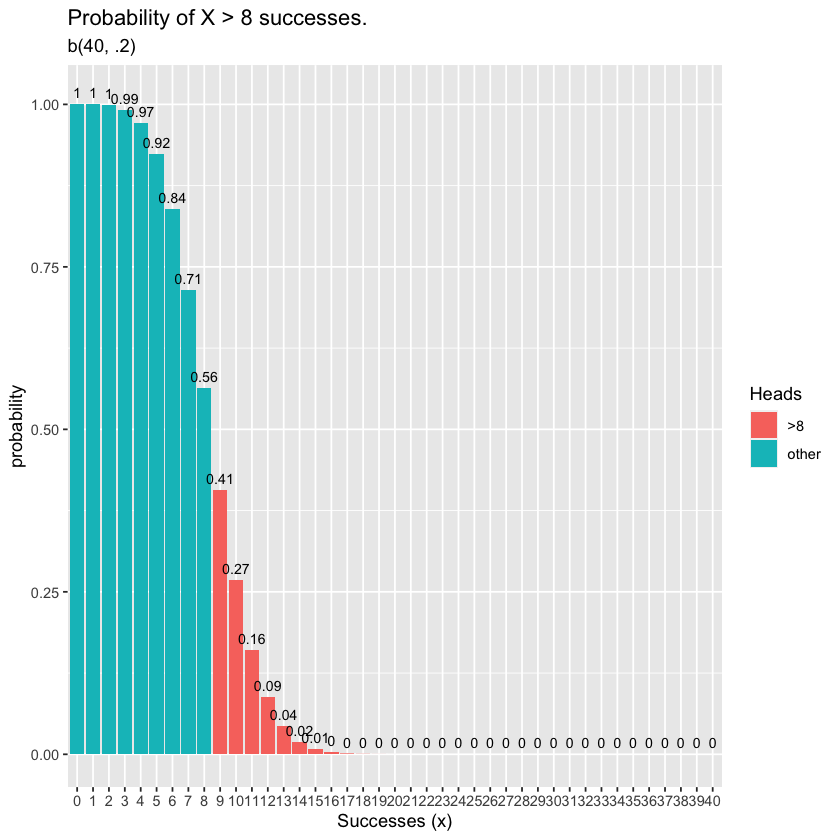

In [15]:
data.frame(heads = 0:40, 
           pmf = dbinom(x = 0:40, size = 40, prob = 0.2),
           cdf = pbinom(q =-1:39, size = 40, prob = 0.2, 
                        lower.tail = FALSE)) %>%
  mutate(Heads = ifelse(heads >8, ">8", "other")) %>%
ggplot(aes(x = factor(heads), y = cdf, fill = Heads)) +
  geom_col() +
  geom_text(
    aes(label = round(cdf,2), y = cdf + 0.01),
    position = position_dodge(0.9),
    size = 3,
    vjust = 0
  ) +
  labs(title = "Probability of X > 8 successes.",
       subtitle = "b(40, .2)",
       x = "Successes (x)",
       y = "probability") 

# `Well, we havea 40.7% probability that :`

**more than 8 (>) people will respond effectively** to bathing with our magic soap

In [16]:
print(" Exact probability")
round(pbinom(8,size=40,p=0.2,lower.tail  = FALSE),3) # needed 7 so we can include 8

#simulated
print("Simulated: (also, this will always be different since you are using 'random')")
mean(rbinom(1000, size = 40, prob = 0.2)>8)

print('Verify that I am not crazy and everything aligns')
round(1 - pbinom(q=8, size=40, prob=.2),3)

[1] " Exact probability"


[1] 0.407

[1] "Simulated: (also, this will always be different since you are using 'random')"


[1] 0.395

[1] "Verify that I am not crazy and everything aligns"


[1] 0.407

# `Considerations and Thoughts about PDF vs CDF:`

`PDF`: is great if you have tag words such as "exact", "some specific number"


`CDF`: "No more than","at most","fewer than","less than x","doesn't exceed","greater than"


`---------------------`

# `Quantile:` 



# `Ex.)` 

**Assume I have 40 neighbors who fall in the bottom 10% of decorum with a 75% chance of being weird and each time we test 40 people.** 

In [17]:
# Answer: We will have 0-26 people of 40 who fit this category.
qbinom(.1, 40,.75)

[1] 26

# Decile Plot:

+ Do the subsamples variations change over different subsamples?

https://www.investopedia.com/terms/d/decile.asp

read that for some idea and examples

[1] 26 28 29 29 30 31 31 32 33 40

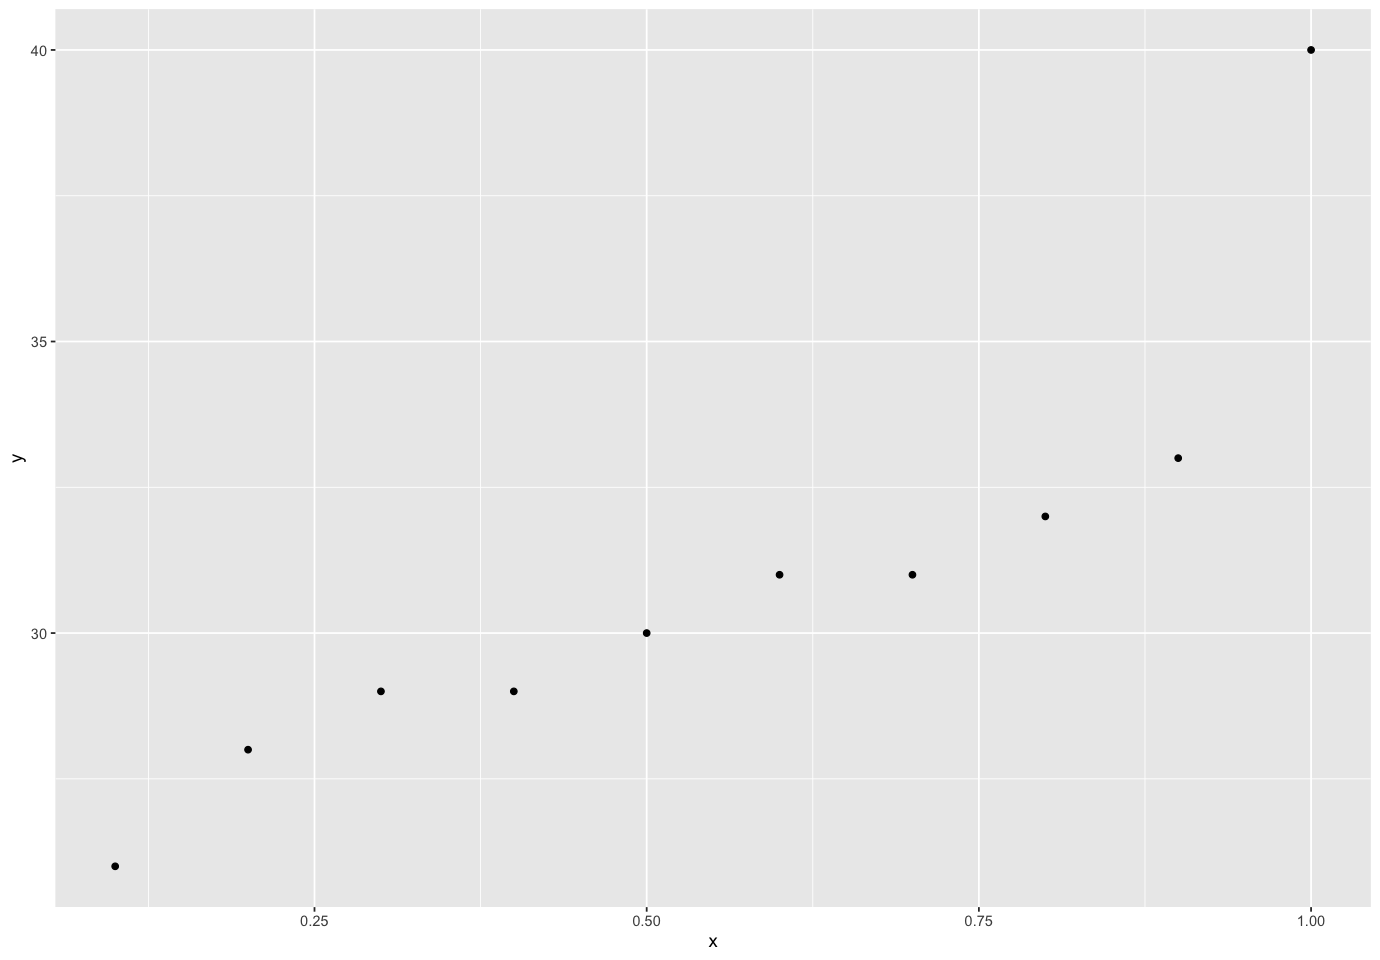

In [32]:
options(repr.plot.width=11.5, repr.plot.height=8)
y <- qbinom(seq(.1,1,.1), 40, .75)
y
x <- seq(.1,1,.1)
qplot(x,y)

# <font color=red>LIKE</font>, Share &

# <font color=red>SUB</font>scribe

# `Citations & Help:`

# ◔̯◔

http://www.math.ntu.edu.tw/~hchen/teaching/StatInference/notes/lecture16.pdf

http://pages.stat.wisc.edu/~larget/R/prob-R.pdf

https://www.mathworks.com/help/stats/binocdf.html#:~:text=The%20binomial%20cumulative%20distribution%20function%20lets%20you%20obtain%20the%20probability,success%20on%20a%20single%20trial

https://rpubs.com/mpfoley73/458411

https://bookdown.org/mpfoley1973/data-sci/binomial.html

http://pages.stat.wisc.edu/~st471-1/lectures/09-13.pdf

http://ianmadd.github.io/pages/Create_a_Binomial_Distribution.html

http://pages.stat.wisc.edu/~larget/R/prob-R.pdf

https://stackoverflow.com/questions/40316153/2-binomial-distributions-overlap-in-r

https://magoosh.com/statistics/understanding-binomial-distribution/

https://www.statology.org/dbinom-pbinom-qbinom-rbinom-in-r/

https://www.cyclismo.org/tutorial/R/probability.html

https://math.stackexchange.com/questions/1430692/binomial-distribution-upper-bound-and-lower-bound

https://tjmurphy.github.io/jabstb/binomial.html

http://rovdownloads.com/blog/tips-on-interpreting-pdf-cdf-and-icdf-3/

https://uw-statistics.github.io/Stat311Tutorial/discrete-distributions.html

https://www.statisticshowto.com/difference-binompdf-binomcdf/

https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_probability/bs704_probability7.html

https://uw-statistics.github.io/Stat311Tutorial/discrete-distributions.html

https://findanyanswer.com/what-is-binomcdf-vs-binompdf